In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('./input/train.csv')
sns.set(rc={"figure.figsize": (12, 8)})

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

TypeError: slice indices must be integers or None or have an __index__ method

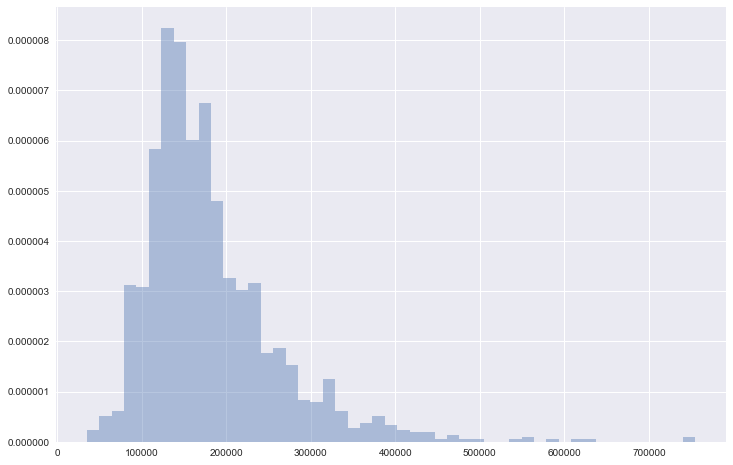

In [5]:
sns.distplot(df_train['SalePrice'])

In [ ]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

In [ ]:
var = 'GrLivArea';
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1);
# print(data)
data.plot.scatter(x=var, y= 'SalePrice');

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'] , df_train[var]],axis = 1)
data.plot.scatter(x=var, y= 'SalePrice')

In [ ]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
sns.boxplot(x=var, y='SalePrice', data=data)

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
sns.boxplot(x = var, y = 'SalePrice', data=data)

In [ ]:
corrmatrix = df_train.corr()
sns.heatmap(corrmatrix)

In [ ]:
k = 10
cols = corrmatrix.nlargest(k, 'SalePrice').index
cm = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)


In [ ]:
total = df_train.isnull().sum().sort_values(ascending = False)

percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

In [ ]:
#dealing with missing data
# df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

df_train.isnull().sum().max() #just checking that there's no missing data missing...


In [ ]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
saleprice_scaled = saleprice_scaled[:,0]
saleprice_scaled.sort()
sns.distplot(saleprice_scaled)
sns.boxplot(saleprice_scaled)
data = pd.DataFrame(saleprice_scaled, columns = ['value'])
data.index.name = 'index'


In [ ]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y= 'SalePrice')

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')

In [ ]:
sns.distplot(df_train['SalePrice'], fit = norm)
plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

In [ ]:
# df_train['SalePrice'] = df_train['SalePrice'].map(np.log)
sns.distplot(df_train['SalePrice'], fit = norm)
plt.figure()
stats.probplot(df_train['SalePrice'], plot = plt)

In [ ]:
data = pd.concat([df_train['GrLivArea'], df_train['SalePrice']], axis = 1)
data.plot.scatter(x = 'GrLivArea', y='SalePrice')